In [1]:
from bs4 import BeautifulSoup
import string
import os
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#Set up class called setlist that a two attributes, date and songlist
class Setlist:
    def __init__(self):
        self.date = ""
        self.songlist = []   

In [5]:
dateDict = {}
all_setlists = []

#years we want to scrape
yearRange = range(11216,11217)


for year in yearRange:

    soup = BeautifulSoup(open('{0}.html'.format(str(year)),encoding = "ISO-8859-1"),"lxml")


In [3]:
dateDict = {}
all_setlists = []

#years we want to scrape
yearRange = range(1986,2016)


for year in yearRange:
    #open the file
    soup = BeautifulSoup(open('{0}.html'.format(str(year)),encoding = "ISO-8859-1"),"lxml")
    #find all div tags with the class "setlist"
    dateDivs = soup.find_all('div', attrs={'class': 'setlist'})
    #for each of those divs, which maps to a single set
    for div in dateDivs:
        #make a new setlist object
        slist = Setlist()
        #the first link inside the first header inside the div has a url with the date of the show
        link = div.h2.a
        if link.has_attr('href'):
            #isolate just the date from the url
            slist.date = str(link['href']).split("=")[1]
        #create a soup just from this div
        song_groups_soup = BeautifulSoup(str(div), "lxml")
        #find all <p> tags
        song_groups = song_groups_soup.find_all('p')
        #this is a list of links to songs
        for group in song_groups:
            #make a soup of this song list
            songs_soup = BeautifulSoup(str(group), "lxml")
            #find all links
            song_links = songs_soup.find_all('a')
            #each link has a song name in it
            for song_link in song_links:
                #dont include links for teases
                if "?teaseid=" not in str(song_link):
                    #trim the url to just the song
                    song_name = song_link['href'].replace("http://phish.net/song/", "").replace("http://phish.net/faq/", "").replace("http://www.livephish.com/", "")
                    #only add the song name to the list if its not already there
                    if song_name not in slist.songlist:
                        slist.songlist.append(song_name)
        #add the setlist to the list of all setlists ever
    
        all_setlists.append(slist)
        
#at this point all_setlists holds just that, all setlists, ready to be compared



In [6]:
import pandas as pd
import numpy as np

songs = []
for i in all_setlists:
    songs.append(i.songlist)
    
dates = []
for i in all_setlists:
    dates.append(i.date)

In [7]:
songs[-3:]

[['the-landlady',
  'free',
  'the-moma-dance',
  'seven-below',
  'prince-caspian',
  'backwards-down-the-number-line',
  'the-line',
  'scent-of-a-mule',
  'saw-it-again',
  'halfway-to-the-moon',
  'the-birdwatcher',
  'frankenstein',
  'wilson',
  'down-with-disease',
  'carini',
  'steam',
  'piper',
  'also-sprach-zarathustra',
  'tweezer',
  'the-horse',
  'silent-in-the-morning',
  'slave-to-the-traffic-light',
  'tweezer-reprise',
  'harpua',
  'after-midnight',
  'no2',
  'keyboard-army',
  'your-pet-cat',
  'once-in-a-lifetime',
  'united-we-stand',
  ''],
 ['sample-in-a-jar',
  'free',
  'simple',
  'back-on-the-train',
  'waiting-all-night',
  '555',
  'roggae',
  'the-dogs',
  '46-days',
  'chalk-dust-torture',
  'ghost',
  'cant-always-listen',
  'waves',
  'bathtub-gin',
  'mikes-song',
  'bouncing-around-the-room',
  'weekapaug-groove',
  'whats-the-use',
  'character-zero',
  ''],
 ['the-moma-dance',
  'possum',
  'wolfmans-brother',
  'birds-of-a-feather',
  'i-didnt

In [8]:
df = pd.DataFrame(songs)
setlists = df.transpose()
setlists.columns = dates

In [9]:
setlists.head()

,1986-02-03,1986-02-28,1986-04-01,1986-04-15,1986-04-29,1986-05-16,1986-05-17,1986-05-24,1986-06-01,1986-09-03,...,2015-08-16,2015-08-20,2015-08-21,2015-08-22,2015-08-23,2015-09-04,2015-09-05,2015-09-06,2015-12-30,2015-12-31
0,slave-to-the-traffic-light,None,quinn-the-eskimo,acdc-bag,None,None,halleys-comet,dog-log,None,None,...,golgi-apparatus,the-bunny,simple,divided-sky,punch-you-in-the-eye,tube,no-men-in-no-mans-land,the-landlady,sample-in-a-jar,the-moma-dance
1,mikes-song,None,have-mercy,dear-mrs-reagan,None,None,back-porch-boogie-blues,halleys-comet,None,None,...,undermind,None,the-dogs,the-moma-dance,buffalo-bill,ghost,martian-monster,free,free,possum
2,daves-energy-guide,None,harry-hood,prep-school-hippie,None,None,None,back-porch-boogie-blues,None,None,...,julius,None,the-man-who-stepped-into-yesterday,mound,a-song-i-heard-the-ocean-sing,halleys-comet,nicu,the-moma-dance,simple,wolfmans-brother
3,you-enjoy-myself,None,the-pendulum,quinn-the-eskimo,None,None,None,None,None,None,...,555,None,avenu-malkenu,army-of-one,limb-by-limb,undermind,stealing-time-from-the-faulty-plan,seven-below,back-on-the-train,birds-of-a-feather
4,alumni-blues,None,daves-energy-guide,slave-to-the-traffic-light,None,None,None,None,None,None,...,nothing,None,free,scabbard,waiting-all-night,yarmouth-road,bouncing-around-the-room,prince-caspian,waiting-all-night,i-didnt-know


In [13]:
#top songs of certain song number in setlist
#percentage of shows these were played in 

song_number = 3

print (setlists.ix[song_number].value_counts()[:15], setlists.ix[song_number].value_counts(1)[:15])



divided-sky                 55
stash                       49
reba                        44
bouncing-around-the-room    36
maze                        34
sparkle                     29
fee                         29
split-open-and-melt         28
poor-heart                  27
guelah-papyrus              27
you-enjoy-myself            26
foam                        26
runaway-jim                 24
its-ice                     24
possum                      21
Name: 3, dtype: int64 divided-sky                 0.031609
stash                       0.028161
reba                        0.025287
bouncing-around-the-room    0.020690
maze                        0.019540
sparkle                     0.016667
fee                         0.016667
split-open-and-melt         0.016092
poor-heart                  0.015517
guelah-papyrus              0.015517
you-enjoy-myself            0.014943
foam                        0.014943
runaway-jim                 0.013793
its-ice                     0.01

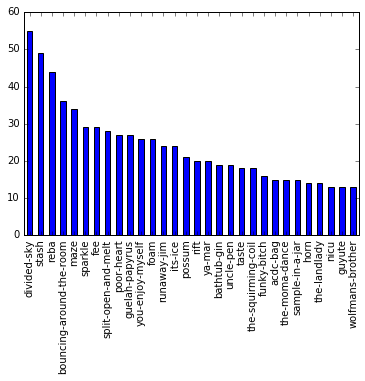

In [14]:
setlists.ix[song_number].value_counts()[:30].plot(kind = 'bar')

**Most 'Typical' Setlist**

In [9]:
max_setlist = []
for i in range (0,49):
    song_number = i
    max_setlist.append(setlists.ix[song_number].value_counts()[:1])
    #print(setlists.ix[song_number].value_counts(1)[:1])

In [10]:
print(max_setlist)

[chalk-dust-torture    92
Name: 0, dtype: int64, foam    107
Name: 1, dtype: int64, foam    65
Name: 2, dtype: int64, divided-sky    55
Name: 3, dtype: int64, stash    52
Name: 4, dtype: int64, stash    53
Name: 5, dtype: int64, stash    48
Name: 6, dtype: int64, divided-sky    30
Name: 7, dtype: int64, possum    37
Name: 8, dtype: int64, david-bowie    55
Name: 9, dtype: int64, david-bowie    65
Name: 10, dtype: int64, david-bowie    47
Name: 11, dtype: int64, mikes-song    39
Name: 12, dtype: int64, tweezer    42
Name: 13, dtype: int64, weekapaug-groove    37
Name: 14, dtype: int64, you-enjoy-myself    52
Name: 15, dtype: int64, you-enjoy-myself    42
Name: 16, dtype: int64, you-enjoy-myself    42
Name: 17, dtype: int64, hold-your-head-up    42
Name: 18, dtype: int64, hold-your-head-up    42
Name: 19, dtype: int64, hold-your-head-up    38
Name: 20, dtype: int64, hold-your-head-up    23
Name: 21, dtype: int64, tweezer-reprise    28
Name: 22, dtype: int64, tweezer-reprise    21
Name: 2

**Longest Shows**

In [12]:
setlist_count = setlists.count()
print (setlist_count.sort_values(ascending=False)[:15])



1994-10-31    50
1999-12-31    48
2011-07-02    47
2009-11-01    42
2010-10-31    37
1987-08-29    35
1991-08-03    34
1991-07-14    34
2009-10-31    34
1990-06-16    34
1999-12-30    33
2013-10-31    33
1988-07-23    33
1988-10-29    33
1987-04-29    33
dtype: int64


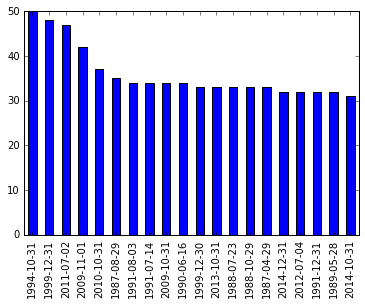

In [43]:
setlist_count.sort_values(ascending=False)[:20].plot(kind= 'bar')

**Looking at Song Debut**

In [15]:
def index_containing_substring(the_list, substring):
    for i, s in enumerate(the_list):
        if substring in s:
              return i
    return -1


def debut(song):
    print ("The song %s debuted on %s" % (song, setlists.columns[index_containing_substring(songs, song)]))

In [17]:
debut('555')

The song 555 debuted on 2013-10-31


**Setlist Compare**

In [157]:

class Compare:
     def __init__(self, show1, show2):
        self.show1 = date1
        self.show2 = date2
        self.matches = 0


In [158]:
def compare(setlist1, setlist2):
    #make an object to store the result
    comparison = Comparison(setlist1.date, setlist2.date)
    #look for every song in show 1 in show 2's setlist, accumulate matches
    for song in setlist1.songlist:
        if song in setlist2.songlist:
            comparison.matches += 1
    return comparison

In [159]:
def date_gap(comparison):
    date1 = comparison.date1
    date2 = comparison.date2
    return total_days(date2) - total_days(date1)

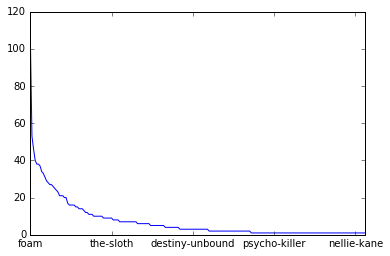

In [18]:

setlists.ix[1].value_counts().plot()